# **Bismillah**

# **Library**

In [3]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [608]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
Model(inputs=[inputgambar, verifikasigambar], output=[1,0])

# **Menentukan dan Membuat Direktori untuk Kelas Data Positif, Negatif, dan Anchor**

Menentukan lokasi dan membuat direktori untuk tiga kategori data berbeda, yaitu positif, negatif, dan anchor. Ini bisa digunakan dalam banyak konteks, seperti klasifikasi gambar, pembelajaran mesin, atau jaringan syaraf dalam kasus Siamese Network 

In [4]:
POS_PATH = os.path.join('data', 'positif')
NEG_PATH = os.path.join('data', 'negatif')
ANC_PATH = os.path.join('data', 'anchor')

In [16]:
#membuat direktori
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

# Ekstraks Dataset Labeled Faces in the Wild (LFW) untuk Pengenalan Wajah

# http://vis-www.cs.umass.edu/lfw/

In [17]:
!tar -xzvf lfw.tgz

x lfw/
x lfw/George_HW_Bush/
x lfw/George_HW_Bush/George_HW_Bush_0001.jpg
x lfw/George_HW_Bush/George_HW_Bush_0002.jpg
x lfw/George_HW_Bush/George_HW_Bush_0003.jpg
x lfw/George_HW_Bush/George_HW_Bush_0004.jpg
x lfw/George_HW_Bush/George_HW_Bush_0005.jpg
x lfw/George_HW_Bush/George_HW_Bush_0006.jpg
x lfw/George_HW_Bush/George_HW_Bush_0007.jpg
x lfw/George_HW_Bush/George_HW_Bush_0008.jpg
x lfw/George_HW_Bush/George_HW_Bush_0009.jpg
x lfw/George_HW_Bush/George_HW_Bush_0010.jpg
x lfw/George_HW_Bush/George_HW_Bush_0011.jpg
x lfw/George_HW_Bush/George_HW_Bush_0012.jpg
x lfw/George_HW_Bush/George_HW_Bush_0013.jpg
x lfw/Curtis_Strange/
x lfw/Curtis_Strange/Curtis_Strange_0001.jpg
x lfw/Marc_Grossman/
x lfw/Marc_Grossman/Marc_Grossman_0001.jpg
x lfw/Marc_Grossman/Marc_Grossman_0002.jpg
x lfw/Marc_Grossman/Marc_Grossman_0003.jpg
x lfw/Marc_Grossman/Marc_Grossman_0004.jpg
x lfw/Michael_Schumacher/
x lfw/Michael_Schumacher/Michael_Schumacher_0001.jpg
x lfw/Michael_Schumacher/Michael_Schumacher_000

In [24]:
os.listdir('lfw')

['Aaron_Eckhart',
 'Aaron_Guiel',
 'Aaron_Patterson',
 'Aaron_Peirsol',
 'Aaron_Pena',
 'Aaron_Sorkin',
 'Aaron_Tippin',
 'Abbas_Kiarostami',
 'Abba_Eban',
 'Abdel_Aziz_Al-Hakim',
 'Abdel_Madi_Shabneh',
 'Abdel_Nasser_Assidi',
 'Abdoulaye_Wade',
 'Abdulaziz_Kamilov',
 'Abdullah',
 'Abdullah_Ahmad_Badawi',
 'Abdullah_al-Attiyah',
 'Abdullah_Gul',
 'Abdullah_Nasseef',
 'Abdullatif_Sener',
 'Abdul_Majeed_Shobokshi',
 'Abdul_Rahman',
 'Abel_Aguilar',
 'Abel_Pacheco',
 'Abid_Hamid_Mahmud_Al-Tikriti',
 'Abner_Martinez',
 'Abraham_Foxman',
 'Aby_Har-Even',
 'Adam_Ant',
 'Adam_Freier',
 'Adam_Herbert',
 'Adam_Kennedy',
 'Adam_Mair',
 'Adam_Rich',
 'Adam_Sandler',
 'Adam_Scott',
 'Adelina_Avila',
 'Adel_Al-Jubeir',
 'Adisai_Bodharamik',
 'Adolfo_Aguilar_Zinser',
 'Adolfo_Rodriguez_Saa',
 'Adoor_Gopalakarishnan',
 'Adriana_Lima',
 'Adriana_Perez_Navarro',
 'Adrianna_Zuzic',
 'Adrian_Annus',
 'Adrian_Fernandez',
 'Adrian_McPherson',
 'Adrian_Murrell',
 'Adrian_Nastase',
 'Adrien_Brody',
 'Afton_S

Pindahkan semua file di lfw ke data\negatif

In [23]:
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

# Ambil gambar menggunakan OpenCV

In [5]:
import uuid

In [6]:
uuid.uuid1()

UUID('6d716606-a8ac-11ef-b8e3-90784112f6e6')

In [7]:
cam = cv2.VideoCapture(0)
while cam.isOpened():
    ret, frame = cam.read()
    if not ret:
        print("Gagal mengambil frame dari kamera")
        break
    # Menampilkan frame dari kamera
    
    frame = frame[120:120+250,210:210+250, :]

    if cv2.waitKey(1) & 0xFF == ord('a'):  # Press 'a' to save as anchor image
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame)
        print(f"Anchor image saved: {imgname}")
    
    if cv2.waitKey(1) & 0xFF == ord('p'):  # Press 'p' to save as positive image
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame)
        print(f"Positive image saved: {imgname}")
                               
    cv2.imshow('Ambil Gambar', frame)
    # Menunggu input tombol dan memeriksa apakah tombol 'q' ditekan untuk keluar
    if cv2.waitKey(1) & 0xFF == ord('q'):  # Tekan 'q' untuk keluar
        print("Keluar dari kamera.")
        break
# Menutup kamera dan jendela tampilan
cam.release()
cv2.destroyAllWindows()

Anchor image saved: data\anchor\836e24b2-a8ac-11ef-9464-90784112f6e6.jpg
Anchor image saved: data\anchor\85e4ab4f-a8ac-11ef-9fd2-90784112f6e6.jpg
Anchor image saved: data\anchor\86ed09f0-a8ac-11ef-9e00-90784112f6e6.jpg
Anchor image saved: data\anchor\8d6a6c07-a8ac-11ef-8567-90784112f6e6.jpg
Anchor image saved: data\anchor\91737a07-a8ac-11ef-86cc-90784112f6e6.jpg
Anchor image saved: data\anchor\917f58fb-a8ac-11ef-a43a-90784112f6e6.jpg
Anchor image saved: data\anchor\918d9f5d-a8ac-11ef-8073-90784112f6e6.jpg
Anchor image saved: data\anchor\919bb654-a8ac-11ef-b585-90784112f6e6.jpg
Anchor image saved: data\anchor\91a67de1-a8ac-11ef-a378-90784112f6e6.jpg
Anchor image saved: data\anchor\91ae9c58-a8ac-11ef-8fb7-90784112f6e6.jpg
Anchor image saved: data\anchor\91baf1e3-a8ac-11ef-9648-90784112f6e6.jpg
Anchor image saved: data\anchor\91bfc443-a8ac-11ef-a22c-90784112f6e6.jpg
Anchor image saved: data\anchor\91cfd924-a8ac-11ef-8575-90784112f6e6.jpg
Anchor image saved: data\anchor\91ea39f1-a8ac-11ef-

In [52]:
frame.shape

(250, 250, 3)

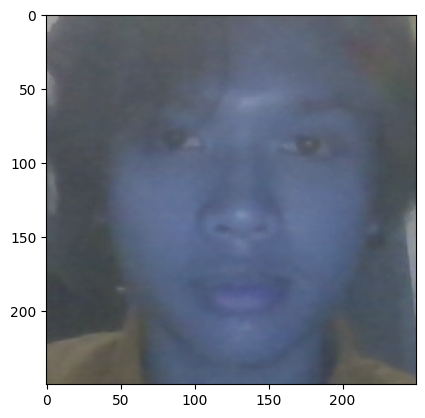

In [53]:
plt.imshow(frame)

harus 250x250

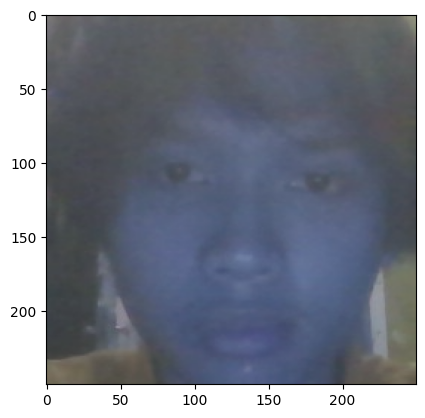

In [40]:
plt.imshow(frame[80:80+250,150:150+250, :])

# **Memuat dan Memproses Gambar**

Memuat Dataset Gambar dengan TensorFlow menggunakan list_files

memungkinkan kita untuk membaca semua file gambar yang memiliki ekstensi .jpg dari folder yang ditentukan (ANC_PATH, POS_PATH, NEG_PATH) dan membatasi jumlah file yang diambil hingga 500 gambar dari masing-masing folder. 

In [280]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\\*.jpg').take(500)
positif = tf.data.Dataset.list_files(POS_PATH+'\\*.jpg').take(500)
negatif = tf.data.Dataset.list_files(NEG_PATH+'\\*.jpg').take(500)

In [281]:
dir_test = anchor.as_numpy_iterator()

In [282]:
dir_test.next()

b'data\\anchor\\cdfabc97-a8ac-11ef-90bd-90784112f6e6.jpg'

# **Preprocessing (Scale dan Resize)**

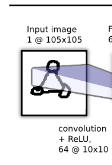

In [524]:
def preprocessing(file_path):
    img_byte = tf.io.read_file(file_path)
    #load gambar
    img = tf.io.decode_jpeg(img_byte)
    #preprocessing dan resize 105x105x3
    img = tf.image.resize(img, (105,105))
    img = img / 255.0
    return img

In [525]:
preprocessing('data\\anchor\\d6477b92-a8ac-11ef-b7cf-90784112f6e6.jpg')

<tf.Tensor: shape=(105, 105, 3), dtype=float32, numpy=
array([[[0.607563  , 0.6507003 , 0.635014  ],
        [0.5955849 , 0.6219354 , 0.6132453 ],
        [0.57208216, 0.58422035, 0.5767507 ],
        ...,
        [0.5218265 , 0.64769024, 0.6220133 ],
        [0.503368  , 0.6479058 , 0.61681336],
        [0.49411765, 0.6313726 , 0.6039216 ]],

       [[0.60234094, 0.63679475, 0.6253101 ],
        [0.57452977, 0.5969388 , 0.58959585],
        [0.54621845, 0.5505135 , 0.5445111 ],
        ...,
        [0.5239696 , 0.6495799 , 0.62402964],
        [0.49887952, 0.6428972 , 0.61570626],
        [0.4907563 , 0.62717086, 0.6039216 ]],

       [[0.5898226 , 0.613352  , 0.60550886],
        [0.5541217 , 0.56924766, 0.5647659 ],
        [0.51662   , 0.5209151 , 0.51092434],
        ...,
        [0.51844954, 0.6388222 , 0.6158908 ],
        [0.4970788 , 0.6340803 , 0.6102708 ],
        [0.49626517, 0.62175536, 0.6021475 ]],

       ...,

       [[0.3713352 , 0.47899157, 0.50112045],
        [0.37

In [526]:
img = preprocessing('data\\anchor\\d6477b92-a8ac-11ef-b7cf-90784112f6e6.jpg')

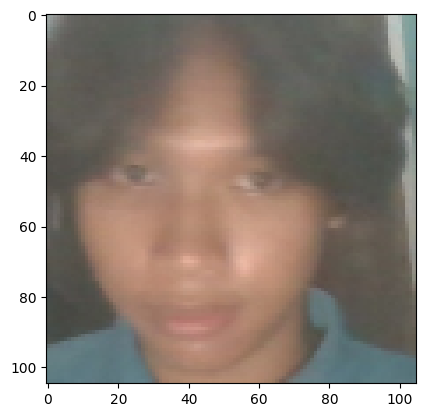

In [527]:
plt.imshow(img)

In [528]:
img.numpy().min()

np.float32(0.2570495)

In [529]:
img.numpy().max()

np.float32(0.9252346)

# Buat label dataset

In [530]:
# (anchor, positif) => 1,1,1,1,1
# (anchor, negatif) => 0,0,0,0,0

In [531]:
tf.ones(len(anchor))

<tf.Tensor: shape=(500,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [532]:
tf.zeros(len(anchor))

<tf.Tensor: shape=(500,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [533]:
class_labels = tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))

In [534]:
iterator_labs = class_labels.as_numpy_iterator()

In [535]:
iterator_labs.next()

np.float32(1.0)

UTAMA INI

In [536]:
positives = tf.data.Dataset.zip((anchor, positif, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negatif, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [537]:
samples = data.as_numpy_iterator()

In [538]:
example = samples.next()

In [539]:
example

(b'data\\anchor\\c74ee71d-a8ac-11ef-85cc-90784112f6e6.jpg',
 b'data\\positif\\57ff6ace-a8ad-11ef-bffe-90784112f6e6.jpg',
 np.float32(1.0))

Membuat Train dan Test Partisi

In [540]:
def preprocessing_twin(input_img, val_img, label):
    return(preprocessing(input_img), preprocessing(val_img), label)

In [541]:
res = preprocessing_twin(*example)

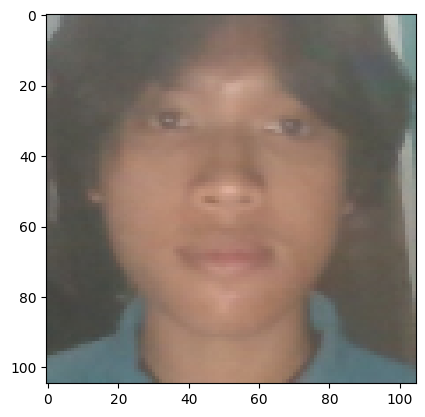

In [542]:
plt.imshow(res[1])

In [543]:
res[2]

np.float32(1.0)

In [544]:
# buat dataloader untuk pipeline
data = data.map(preprocessing_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [545]:
samples = data.as_numpy_iterator()

In [546]:
len(samples.next())

3

In [547]:
samp = samples.next()

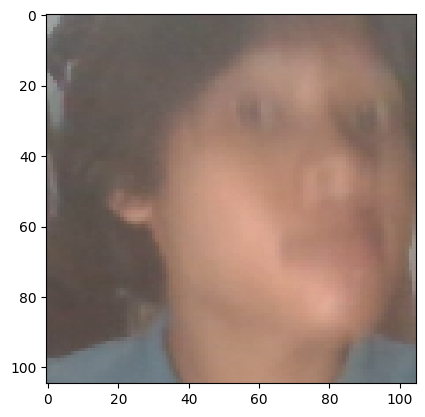

In [548]:
plt.imshow(samp[0])

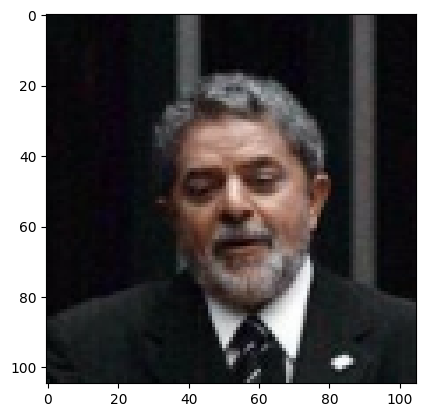

In [549]:
plt.imshow(samp[1])

In [550]:
samp[2]

np.float32(0.0)

In [551]:
round(len(data)*.7)

700

In [552]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [553]:
#membuat traning partisi
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [555]:
train_samples = train_data.as_numpy_iterator()

In [556]:
train_sample = train_samples.next()

In [557]:
len(train_sample[0])

16

In [558]:
round(len(data)*.3)

300

In [559]:
#membuat testing partisi
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# **MODEL ENGINEERING**

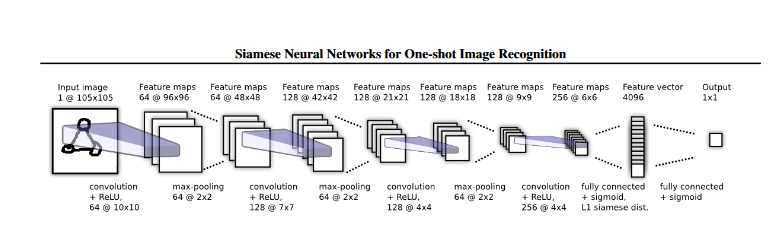

In [560]:
inpt = Input(shape=(105,105,3), name='input_gambar')
inpt

<KerasTensor shape=(None, 105, 105, 3), dtype=float32, sparse=False, name=input_gambar>

In [378]:
conv1 = Conv2D(64, (10,10), activation='relu')(inpt)
conv1

<KerasTensor shape=(None, 96, 96, 64), dtype=float32, sparse=False, name=keras_tensor_7>

In [379]:
maxp1 = MaxPooling2D(64, (2,2), padding='same')(conv)
maxp1

<KerasTensor shape=(None, 48, 48, 64), dtype=float32, sparse=False, name=keras_tensor_8>

In [382]:
conv2 = Conv2D(128, (7,7), activation='relu')(maxp1)
conv2

<KerasTensor shape=(None, 42, 42, 128), dtype=float32, sparse=False, name=keras_tensor_11>

In [384]:
maxp2 = MaxPooling2D(64, (2,2), padding='same')(conv2)
maxp2

<KerasTensor shape=(None, 21, 21, 128), dtype=float32, sparse=False, name=keras_tensor_13>

In [387]:
conv3 = Conv2D(128, (4,4), activation='relu')(maxp2)
conv3

<KerasTensor shape=(None, 18, 18, 128), dtype=float32, sparse=False, name=keras_tensor_16>

In [388]:
maxp3 = MaxPooling2D(64, (2,2), padding='same')(conv3)
maxp3

<KerasTensor shape=(None, 9, 9, 128), dtype=float32, sparse=False, name=keras_tensor_17>

In [389]:
conv4 = Conv2D(256, (4,4), activation='relu')(maxp3)
conv4

<KerasTensor shape=(None, 6, 6, 256), dtype=float32, sparse=False, name=keras_tensor_18>

In [391]:
flat1 = Flatten()(conv4)
flat1

<KerasTensor shape=(None, 9216), dtype=float32, sparse=False, name=keras_tensor_19>

In [394]:
dens = Dense(4096, activation='sigmoid')(flat1)
dens

<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, name=keras_tensor_20>

In [396]:
mod = Model(inputs=[inpt], outputs=[dens], name='embedding')
mod.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_gambar (InputLayer)            │ (None, 105, 105, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 96, 96, 64)          │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 42, 42, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 18, 18, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 6, 6, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [561]:
#membuat embedding layer
def make_embedding():
    inpt = Input(shape=(105,105,3), name='input_gambar')

    #blok pertama
    conv1 = Conv2D(64, (10,10), activation='relu')(inpt)
    maxp1 = MaxPooling2D(64, (2,2), padding='same')(conv1)

    #blok pertama
    conv2 = Conv2D(128, (7,7), activation='relu')(maxp1)
    maxp2 = MaxPooling2D(64, (2,2), padding='same')(conv2)

    #blok pertama
    conv3 = Conv2D(128, (4,4), activation='relu')(maxp2)
    maxp3 = MaxPooling2D(64, (2,2), padding='same')(conv3)

    #final embedding blok
    conv4 = Conv2D(256, (4,4), activation='relu')(maxp3)
    flat1 = Flatten()(conv4)
    dens = Dense(4096, activation='sigmoid')(flat1)
    
    return Model(inputs=[inpt], outputs=[dens], name='embedding')

In [562]:
embedding = make_embedding()

In [563]:
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_gambar (InputLayer)            │ (None, 105, 105, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 96, 96, 64)          │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 42, 42, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 18, 18, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 6, 6, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4096)                │      37,752,832 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [604]:
class L1Dist(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(L1Dist, self).__init__(**kwargs)

    def call(self, input_embedding, validation_embedding):
        
        input_embedding = input_embedding[0] if isinstance(input_embedding, list) else input_embedding
        validation_embedding = validation_embedding[0] if isinstance(validation_embedding, list) else validation_embedding

        return tf.math.abs(input_embedding - validation_embedding)

In [600]:
l1

<L1Dist name=l1_dist, built=False>

In [566]:
# l1(anchor_embedding, val_embedding)

# **Membuat Model Siamese**

In [465]:
input_image = Input(name='input_img', shape=(105,105,3))
val_image = Input(name='val_img', shape=(105,105,3))

In [466]:
inp_embedding = embedding(input_image)
val_embedding = embedding(val_image)

In [467]:
inp_embedding

[<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, name=keras_tensor_57>]

In [468]:
val_embedding

[<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, name=keras_tensor_58>]

In [469]:
siamese_layer = L1Dist()

In [475]:
distances = siamese_layer(inp_embedding, val_embedding)

In [477]:
classifier = Dense(1, activation='sigmoid')(distances)
classifier

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_65>

In [482]:
siamese_network = Model(inputs=[input_image, val_image], outputs=classifier, name='SiameseNetwork')

In [483]:
siamese_network.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)        │ (None, 105, 105, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ val_img (InputLayer)          │ (None, 105, 105, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Functional)        │ (None, 4096)              │      38,960,448 │ input_img[0][0],           │
│                               │                           │                 │ val_img[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ l1_dist_4 (L1Dist)            │ (None, 4096)              │               0 │ embedding[8][0],           │
│                               │                           │                 │ embedding[9][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_6 (Dense)               │ (None, 1)                 │           4,097 │ l1_dist_4[4][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [485]:
def make_siamese_model():

    #handle input
    input_image = Input(name='input_img', shape=(105,105,3))

    #validation input
    val_image = Input(name='val_img', shape=(105,105,3))

    #kombinasik jarak siamese komponen
    siamese_layer = L1Dist()
    siamese_layer.name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(val_image))

    #klasifikasi layer
    classifier = Dense(1, activation='sigmoid')(distances)

    return Model(inputs=[input_image, val_image], outputs=classifier, name='SiameseNetwork')

In [486]:
siamese_model = make_siamese_model()

In [487]:
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)        │ (None, 105, 105, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ val_img (InputLayer)          │ (None, 105, 105, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Functional)        │ (None, 4096)              │      38,960,448 │ input_img[0][0],           │
│                               │                           │                 │ val_img[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ distance (L1Dist)             │ (None, 4096)              │               0 │ embedding[11][0],          │
│                               │                           │                 │ embedding[12][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_7 (Dense)               │ (None, 1)                 │           4,097 │ distance[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

# **TRAINING**

Setup loss dan optimized

In [522]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [523]:
opt = tf.keras.optimizers.Adam(1e-4)

Establish Checkpoints

In [490]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

Build Train Step Function

In [500]:
test_batch = train_data.as_numpy_iterator()

In [502]:
batch_1 = test_batch.next()

In [503]:
len(batch_1)

3

In [508]:
X = batch_1[:2]
np.array(X).shape

(2, 16, 105, 105, 3)

In [510]:
y = batch_1[2]

In [511]:
y

array([0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0.],
      dtype=float32)

In [568]:
@tf.function
def train_step(batch):
    with tf.GradientTape() as tape:
        # Ambil anchor dan positif/negatif gambar
        x = batch[:2]  # x[0] is the input image, x[1] is the validation image
        y = batch[2]   # y is the label (1 for similar, 0 for dissimilar)

        # Forward pass: Lakukan prediksi dengan model Siamese
        yhat = siamese_model(x, training=True)

        # Kalkulasi loss: Menggunakan binary cross-entropy loss
        loss = tf.keras.losses.BinaryCrossentropy()(y, yhat)

    print("Loss:", loss)

    # Kalkulasi gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Update weights dan terapkan ke siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    # Return loss untuk monitoring
    return loss

building training loop

In [569]:
def train(data, EPOCHS):
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        for idx, batch in enumerate(data):
            # Run train step here
            train_step(batch)
            progbar.update(idx+1)
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

# Train model

In [570]:
EPOCHS = 50

In [571]:
train(train_data, EPOCHS)


 Epoch 1/50
Loss: Tensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
Loss: Tensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
43/44 ━━━━━━━━━━━━━━━━━━━━ 8s 9s/step Loss: Tensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
44/44 ━━━━━━━━━━━━━━━━━━━━ 429s 9s/step

 Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 360s 8s/step

 Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 359s 8s/step

 Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 357s 8s/step

 Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 358s 8s/step

 Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 357s 8s/step

 Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 364s 8s/step

 Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 395s 9s/step

 Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 380s 9s/step

 Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 369s 8s/step

 Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 355s 8s/step

 Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 362s 8s/step

 Epoch 13/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 364s 8s/step

 Epoch 14/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 359s 8s/step

 

In [572]:
from tensorflow.keras.metrics import Precision, Recall

In [573]:
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [574]:
# Make predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 ━━━━━━━━━━━━━━━━━━━━ 81s 81s/step


array([[4.6509704e-06],
       [9.9999475e-01],
       [7.7007036e-07],
       [8.0262062e-08],
       [1.4083795e-07],
       [9.9448353e-01],
       [4.2043422e-07],
       [3.3130573e-06],
       [9.9998868e-01],
       [4.0631335e-07],
       [9.8342913e-01],
       [9.9999326e-01],
       [1.1723928e-06],
       [9.9993563e-01],
       [2.0979878e-06],
       [3.3246151e-03]], dtype=float32)

In [575]:
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0]

In [576]:
y_true

array([0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.],
      dtype=float32)

In [577]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

np.float32(1.0)

In [578]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

np.float32(1.0)

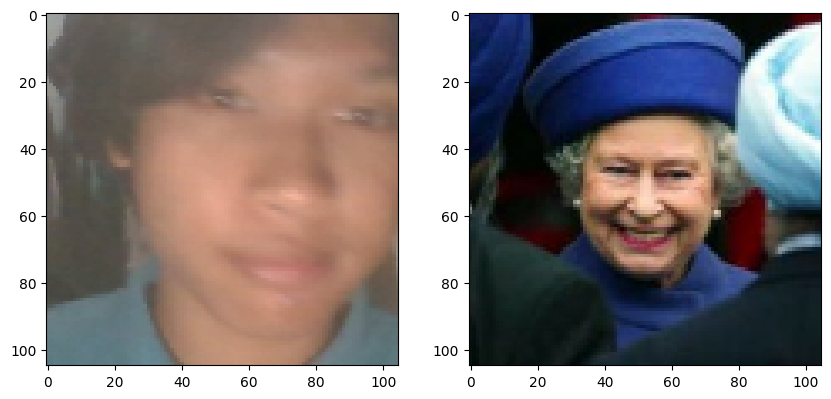

In [588]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

In [595]:
# Save weights
siamese_model.save('modelfotoilham.h5')

In [596]:
L1Dist

__main__.L1Dist

In [605]:
# Reload model 
model = tf.keras.models.load_model('modelfotoilham.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [606]:
# Make predictions with reloaded model
model.predict([test_input, test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 54s 54s/step


array([[4.6509704e-06],
       [9.9999475e-01],
       [7.7007036e-07],
       [8.0262062e-08],
       [1.4083795e-07],
       [9.9448353e-01],
       [4.2043422e-07],
       [3.3130573e-06],
       [9.9998868e-01],
       [4.0631335e-07],
       [9.8342913e-01],
       [9.9999326e-01],
       [1.1723928e-06],
       [9.9993563e-01],
       [2.0979878e-06],
       [3.3246151e-03]], dtype=float32)

In [607]:
# View model summary
model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)        │ (None, 105, 105, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ val_img (InputLayer)          │ (None, 105, 105, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Functional)        │ (None, 4096)              │      38,960,448 │ input_img[0][0],           │
│                               │                           │                 │ val_img[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ l1_dist_7 (L1Dist)            │ (None, 4096)              │               0 │ embedding[0][0],           │
│                               │                           │                 │ embedding[1][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_7 (Dense)               │ (None, 1)                 │           4,097 │ l1_dist_7[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

# **REAL TIME TEST**

In [ ]:
application_data\verification_images

In [611]:
os.listdir(os.path.join('application_data', 'verification_images'))

['4b26ba94-a8ad-11ef-95d3-90784112f6e6 - Copy.jpg',
 '4b26ba94-a8ad-11ef-95d3-90784112f6e6.jpg',
 '4b40d1f5-a8ad-11ef-a6fe-90784112f6e6 - Copy.jpg',
 '4b4f794f-a8ad-11ef-9108-90784112f6e6.jpg',
 '4b5d85fb-a8ad-11ef-b49d-90784112f6e6 - Copy.jpg',
 '4b5d85fb-a8ad-11ef-b49d-90784112f6e6.jpg',
 '4b6e5701-a8ad-11ef-87a8-90784112f6e6 - Copy.jpg',
 '4b6e5701-a8ad-11ef-87a8-90784112f6e6.jpg',
 '4bc9e2ea-a8ad-11ef-a8bb-90784112f6e6.jpg',
 '4bd85763-a8ad-11ef-ae55-90784112f6e6 - Copy.jpg',
 '4bd85763-a8ad-11ef-ae55-90784112f6e6.jpg',
 '4bfc364f-a8ad-11ef-bf08-90784112f6e6.jpg',
 '4c194907-a8ad-11ef-adf0-90784112f6e6.jpg',
 '4c2552ab-a8ad-11ef-8e0a-90784112f6e6.jpg',
 '4c41e0df-a8ad-11ef-a006-90784112f6e6.jpg',
 '4c507426-a8ad-11ef-95ae-90784112f6e6.jpg',
 '4c61787a-a8ad-11ef-b128-90784112f6e6 - Copy.jpg',
 '4c61787a-a8ad-11ef-b128-90784112f6e6.jpg',
 '4c851851-a8ad-11ef-b42a-90784112f6e6 - Copy.jpg',
 '4ca16825-a8ad-11ef-b3e4-90784112f6e6 - Copy.jpg',
 '4f38a019-a8ad-11ef-9448-90784112f6e6 - Cop

In [612]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data\\input_image\\input_image.jpg'

In [613]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data\verification_images\4b26ba94-a8ad-11ef-95d3-90784112f6e6 - Copy.jpg
application_data\verification_images\4b26ba94-a8ad-11ef-95d3-90784112f6e6.jpg
application_data\verification_images\4b40d1f5-a8ad-11ef-a6fe-90784112f6e6 - Copy.jpg
application_data\verification_images\4b4f794f-a8ad-11ef-9108-90784112f6e6.jpg
application_data\verification_images\4b5d85fb-a8ad-11ef-b49d-90784112f6e6 - Copy.jpg
application_data\verification_images\4b5d85fb-a8ad-11ef-b49d-90784112f6e6.jpg
application_data\verification_images\4b6e5701-a8ad-11ef-87a8-90784112f6e6 - Copy.jpg
application_data\verification_images\4b6e5701-a8ad-11ef-87a8-90784112f6e6.jpg
application_data\verification_images\4bc9e2ea-a8ad-11ef-a8bb-90784112f6e6.jpg
application_data\verification_images\4bd85763-a8ad-11ef-ae55-90784112f6e6 - Copy.jpg
application_data\verification_images\4bd85763-a8ad-11ef-ae55-90784112f6e6.jpg
application_data\verification_images\4bfc364f-a8ad-11ef-bf08-90784112f6e6.jpg
application_data\verification

In [5]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

OpenCV Real Time Verif

In [6]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(model, 0.9, 0.7)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

NameError: name 'model' is not defined

In [ ]:
np.sum(np.squeeze(results) > 0.9)

In [609]:
32/50

0.64